### <i>Filipe de Paula Oliveira</i>

# <font color = blue>Prevendo Customer Churn em Operadoras de Telecom</font>

#### Projeto Prático 04 da Formação Cientista de Dados da Data Science Academy

Customer Churn (ou Rotatividade de Clientes, em uma tradução livre) refere-se a uma decisão tomada pelo cliente sobre o término do relacionamento comercial. Refere-se também à perda de clientes.  
De acordo com a regra de lucratividade do cliente 80/20, 20% dos clientes estão gerando 80% da receita. Portanto, é muito importante prever os usuários que provavelmente abandonarão o relacionamento comercial e os fatores que afetam as decisões do cliente.  

<b>Problema:  Prever o Customer Churn em uma Operadora de Telecom.</b>

No dataset, a coluna 'churn' pode assumir os valores 'yes', quando o cliente terminou o relacionamento comercial, e 'no', quando o manteve.

# 1 Importação de pacotes

## 1.1 Leitura e Manipulação de Dados

In [1]:
import numpy as np
import pandas as pd

## 1.2 Análise Gráfica

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.colors import Normalize
from matplotlib.cm import Blues

## 1.3 Pré Processamento

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

## 1.4 Machine Learning

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline

## 1.5 Métricas

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

# 2 Leitura dos datasets

In [6]:
df_orig_train = pd.read_csv('projeto4_telecom_treino.csv')
df_orig_test = pd.read_csv('projeto4_telecom_teste.csv')

# 3 Análise Exploratória

## 3.1 Análise Descritiva

In [7]:
df_orig_train.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [8]:
df_orig_train.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

As colunas state, area_code, international_plan, voice_mail_plan e churn são não numéricas.

In [9]:
df_orig_train.shape

(3333, 21)

In [10]:
df_orig_test.shape

(1667, 21)

In [11]:
df_orig_train.describe()

,Unnamed: 0,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1667.00000,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,962.29855,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,834.00000,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,1667.00000,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,2500.00000,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,3333.00000,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


A coluna number_vmail_messages tem muitos valores 0 (mais de 50%). As colunas de minutos (total_day_minutes e total_eve_minutes) tem desvio padrão elevado.

In [12]:
df_orig_train['churn'].value_counts()

no     2850
yes     483
Name: churn, dtype: int64

Dataset um pouco desbalanceado (~15% de resposta sim, e 0% resposta não)

In [13]:
df_orig_train.nunique(axis = 0)

Unnamed: 0                       3333
state                              51
account_length                    212
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1667
total_day_calls                   119
total_day_charge                 1667
total_eve_minutes                1611
total_eve_calls                   123
total_eve_charge                 1440
total_night_minutes              1591
total_night_calls                 120
total_night_charge                933
total_intl_minutes                162
total_intl_calls                   21
total_intl_charge                 162
number_customer_service_calls      10
churn                               2
dtype: int64

Há apenas 3 valores de area_code, 2 de international plan e 2 de voice_mail_plan.

In [14]:
df_orig_train.isnull().values.any()

False

Não há valores null.

## 3.2 Análise Gráfica

In [15]:
df_numeric = df_orig_train.select_dtypes(include=[np.number])
df_categorical = df_orig_train.select_dtypes(include=[object])

In [16]:
df_numeric.shape

(3333, 16)

### 3.2.1 Transformando as colunas categóricas em numéricas (encoding)

In [17]:
df_cat_train = df_orig_train.copy()
df_cat_test = df_orig_test.copy()

In [18]:
cat_columns = ['state','area_code','international_plan','voice_mail_plan','churn']
enc = LabelEncoder()
for names in cat_columns:
    df_cat_train.loc[:,names] = enc.fit_transform(df_cat_train.loc[:,names])
    df_cat_test.loc[:,names] = enc.fit_transform(df_cat_test.loc[:,names])

### 3.2.2 Boxplot das variáveis numéricas

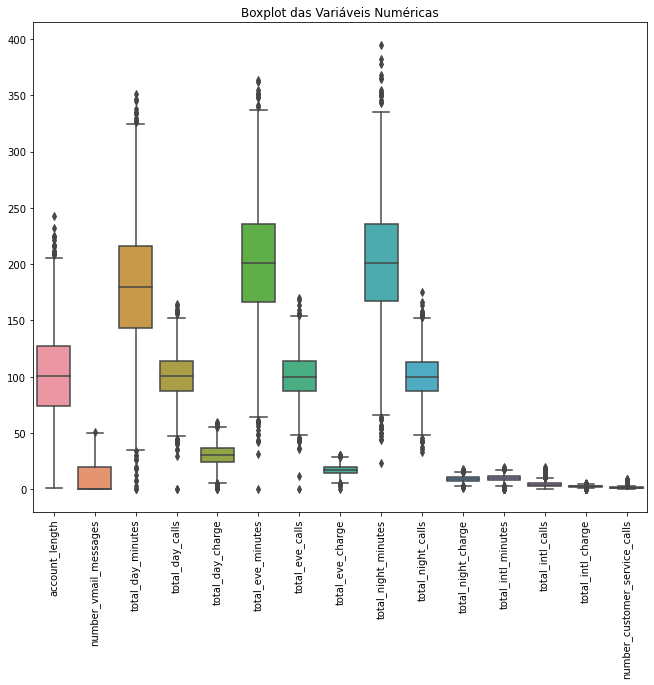

In [19]:
f1, ax1 = plt.subplots(figsize=(11, 9))
g1 = sns.boxplot(data = df_numeric.iloc[:,1:])
g1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.title('Boxplot das Variáveis Numéricas')
plt.show()
f1 = g1.get_figure()
f1.tight_layout()
f1.savefig('plots/boxplot.png', facecolor = 'white')

A escala não é tão diferente, mas algumas variáveis são muito menores (as últimas 5). Além disso, a coluna "Unnamed: 0", oculta nesse gráfico, possui uma escala consideravelmente maior.

### 3.2.3 Histogramas das variáveis numéricas

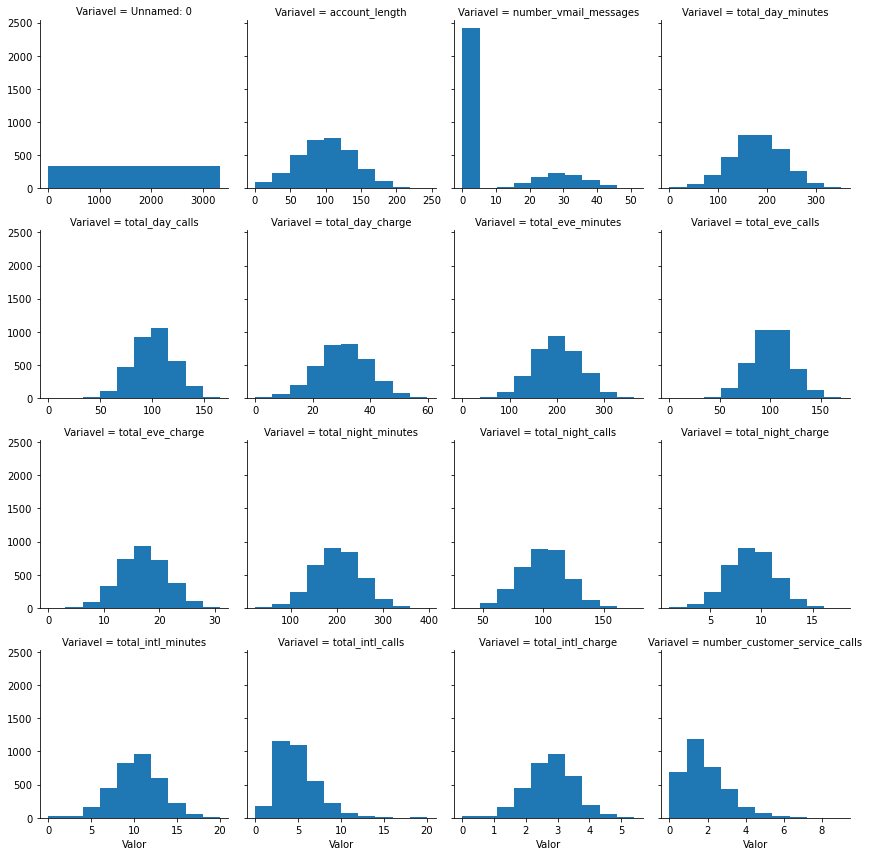

In [20]:
g2 = sns.FacetGrid(df_numeric.melt(var_name = 'Variavel', value_name = 'Valor'), col= 'Variavel', col_wrap = 4, sharex = False)
g2.map(plt.hist, 'Valor')
plt.show()
f2 = g2.fig
f2.savefig('plots/histplots.png', facecolor = 'white', )

A maioria das variáveis assume uma distribuição normal, enquanto a variável "Unnamed: 0" assume uma distribuição uniforme, e a variável number_vmail_messages possui uma grande quantidade de valores 0, quando os clientes não possuem voice_mail_plan, como demonstrado no código abaixo.

In [21]:
df_orig_train[df_orig_train.voice_mail_plan.eq(0)]['number_vmail_messages'].value_counts()

Series([], Name: number_vmail_messages, dtype: int64)

### 3.2.4 Matriz de correlações

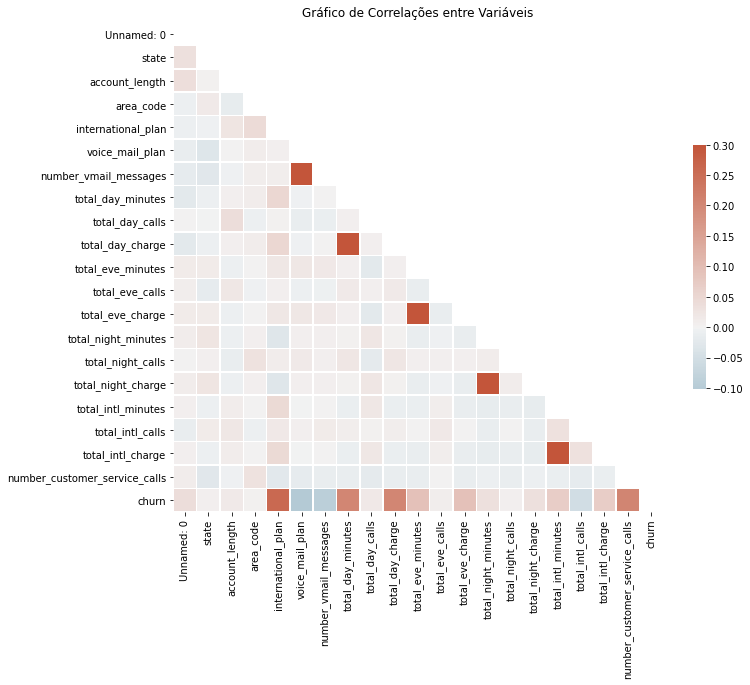

In [22]:
corr = df_cat_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f3, ax3 = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Gráfico de Correlações entre Variáveis')
plt.show()
f3.tight_layout()
f3.savefig('plots/corrplot.png', facecolor = 'white', )

Pode se observar que a variável target tem correlação média com international_plan, total_day_minutes, total_day_charge e number_customer_service_calls. Além disso, todas as variáveis "charge" tem correlação com as variáveis "minutes", e a variável number_vmail_messages com a voice_mail_plan.

### 3.2.5 Treemap da quantidade de registros por "state"

In [23]:
state_counts = pd.DataFrame(df_orig_train.state.value_counts())

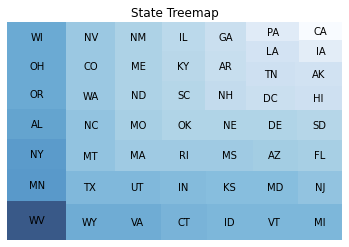

In [24]:
cmap = Blues
mini=min(state_counts['state'].values)
maxi=max(state_counts['state'].values)
norm = Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in state_counts['state'].values]

ax4 = squarify.plot(sizes=state_counts['state'], label=state_counts.index, alpha=.8, color = colors)
plt.axis('off')
plt.title('State Treemap')
plt.show()
f4 = ax4.get_figure()
f4.tight_layout()
f4.savefig('plots/stateTreemap.png', facecolor = 'white')

### 3.2.6 Scatterplots de variáveis com correlação

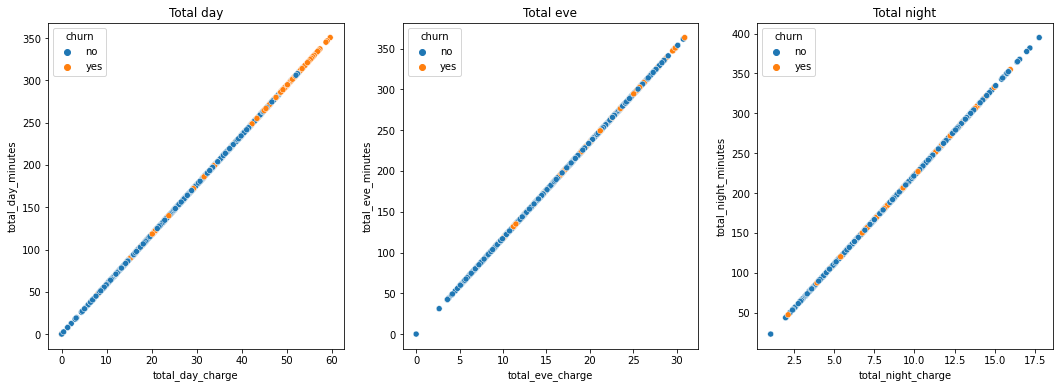

In [25]:
f5, ax5 = plt.subplots(1,3,figsize = (18,6))
for axN, name in [(0,'day'),(1,'eve'),(2,'night')]:
    ax5[axN].set_title('Total '+name)
    ax5[axN] = sns.scatterplot(x = "total_"+name+"_charge", y = "total_"+name+"_minutes",
                               hue = 'churn', data = df_orig_train, ax=ax5[axN])
plt.show()
f5.tight_layout()
f5.savefig('plots/scatterplots.png', facecolor = 'white')

# 4 Pré Processamento

In [26]:
df_prep_train = df_cat_train
df_prep_test = df_cat_test

In [27]:
seed = 1234

## 4.2 Padronização

In [28]:
scaler = StandardScaler()
scaler.fit(df_prep_train.iloc[:,0:len(df_prep_train.columns)-1])

rescaled_values_train = scaler.transform(df_prep_train.iloc[:,0:len(df_prep_train.columns)-1])
df_padr_train = pd.DataFrame(rescaled_values_train)
df_padr_train['churn'] = df_prep_train['churn']
df_padr_train.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,churn
0,-1.731531,-0.678649,0.676489,-0.000846,-0.327580,1.617086,1.234883,1.566767,0.476643,1.567036,...,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,0
1,-1.730492,0.603170,0.149065,-0.000846,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.334013,...,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,0
2,-1.729453,0.333313,0.902529,-0.000846,-0.327580,-0.618396,-0.591760,1.168304,0.675985,1.168464,...,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,0
3,-1.728413,0.603170,-0.428590,-1.410205,3.052685,-0.618396,-0.591760,2.196596,-1.466936,2.196759,...,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,0
4,-1.727374,0.670634,-0.654629,-0.000846,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-0.240041,...,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,0


In [29]:
rescaled_values_test = scaler.transform(df_prep_test.iloc[:,0:len(df_prep_test.columns)-1])
df_padr_test = pd.DataFrame(rescaled_values_test)
df_padr_test['churn'] = df_prep_test['churn']
df_padr_test.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,churn
0,-1.731531,-1.015970,-0.001628,1.408514,-0.32758,-0.618396,-0.591760,-1.999204,1.124503,-1.999591,...,-1.361185,0.214955,0.694692,-1.385473,0.694640,0.129936,-0.601195,0.126607,1.092641,0
1,-1.730492,-0.004008,0.902529,1.408514,-0.32758,-0.618396,-0.591760,0.804729,-0.719406,0.804456,...,1.952128,0.864604,-2.109550,-0.976594,-2.109101,-0.264128,1.024263,-0.258182,-1.188218,0
2,-1.729453,0.603170,0.048603,-1.410205,-0.32758,1.617086,1.527146,2.110293,-0.270887,2.110347,...,0.245270,0.716112,1.966291,1.374463,1.964673,1.240482,0.617898,1.241169,-0.427932,0
3,-1.728413,0.400777,-0.051859,-0.000846,-0.32758,-0.618396,-0.591760,0.679865,1.124503,0.680240,...,-0.608159,-1.471812,0.390141,-0.925484,0.391414,1.956963,-1.007560,1.957673,-0.427932,0
4,-1.727374,0.940490,0.174180,-0.000846,-0.32758,-0.618396,-0.591760,0.323635,-1.118088,0.323793,...,0.044463,-1.518215,0.071747,0.352264,0.070610,-0.908961,-0.194831,-0.908343,0.332354,0


## 4.3 X e Y split

In [30]:
df_train_X = df_padr_train.values[:,0:len(df_padr_train.columns)-1]
df_train_Y = df_padr_train.values[:,len(df_padr_train.columns)-1]
df_test_X = df_padr_test.values[:,0:len(df_padr_test.columns)-1]
df_test_Y = df_padr_test.values[:,len(df_padr_test.columns)-1]

## 4.4 Balanceamento de Classes (SMOTE)

In [31]:
SM = SMOTE(random_state = seed, n_jobs = -1)
df_train_X, df_train_Y = SM.fit_resample(df_train_X, df_train_Y)

In [32]:
pd.value_counts(df_train_Y)

1.0    2850
0.0    2850
dtype: int64

# 5 Modelo de Regressão Logística

In [33]:
modelo_lr = LogisticRegression(max_iter = 1000, random_state = seed)
modelo_lr.fit(df_train_X, df_train_Y)

LogisticRegression(max_iter=1000, random_state=1234)

In [34]:
previsoes_lr_train = modelo_lr.predict(df_train_X)
print("Confusion Matrix nos Dados de Treino")
print(confusion_matrix(previsoes_lr_train, df_train_Y))
print(classification_report(df_train_Y, previsoes_lr_train))
acc_lr_train = accuracy_score(df_train_Y, previsoes_lr_train)
auc_lr_train = roc_auc_score(df_train_Y, modelo_lr.predict_proba(df_train_X)[:,1])
print('O modelo teve {:2.2%} de precisão e {:2.2%} de AUC nos dados de treino.'.format(acc_lr_train, auc_lr_train))

Confusion Matrix nos Dados de Treino
[[2190  610]
 [ 660 2240]]
              precision    recall  f1-score   support

         0.0       0.78      0.77      0.78      2850
         1.0       0.77      0.79      0.78      2850

    accuracy                           0.78      5700
   macro avg       0.78      0.78      0.78      5700
weighted avg       0.78      0.78      0.78      5700

O modelo teve 77.72% de precisão e 83.61% de AUC nos dados de treino.


In [35]:
previsoes_lr_test = modelo_lr.predict(df_test_X)
print("Confusion Matrix nos Dados de Teste")
print(confusion_matrix(previsoes_lr_test, df_test_Y)) 
print(classification_report(df_test_Y, previsoes_lr_test))
acc_lr_test = accuracy_score(df_test_Y, previsoes_lr_test)
auc_lr_test = roc_auc_score(df_test_Y, modelo_lr.predict_proba(df_test_X)[:,1])
print('O modelo teve {:2.2%} de precisão e {:2.2%} de AUC nos dados de teste.'.format(acc_lr_test, auc_lr_test))

Confusion Matrix nos Dados de Teste
[[1111   45]
 [ 332  179]]
              precision    recall  f1-score   support

         0.0       0.96      0.77      0.85      1443
         1.0       0.35      0.80      0.49       224

    accuracy                           0.77      1667
   macro avg       0.66      0.78      0.67      1667
weighted avg       0.88      0.77      0.81      1667

O modelo teve 77.38% de precisão e 83.81% de AUC nos dados de teste.


# 6 Automatizando com Pipeline

In [36]:
X_train_pipe = df_prep_train.values[:,0:len(df_prep_train.columns)-1]
Y_train_pipe = df_prep_train.values[:,len(df_prep_train.columns)-1]
X_test_pipe = df_prep_test.iloc[:,0:len(df_prep_test.columns)-1]
Y_test_pipe = df_prep_test.iloc[:,len(df_prep_test.columns)-1]

In [37]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state = seed, n_jobs = -1)), 
    ('lr', LogisticRegression(max_iter = 1000, random_state = seed))
])

pipe.fit(X_train_pipe, Y_train_pipe)

Pipeline(steps=[('scaler', StandardScaler()),
                ('smote', SMOTE(n_jobs=-1, random_state=1234)),
                ('lr', LogisticRegression(max_iter=1000, random_state=1234))])

In [38]:
acc_pipe = accuracy_score(Y_test_pipe, pipe.predict(X_test_pipe))
auc_pipe = roc_auc_score(Y_test_pipe, pipe.predict_proba(X_test_pipe)[:,1])
print('O modelo teve {:2.2%} de precisão e {:2.2%} de AUC nos dados de teste.'.format(acc_pipe, auc_pipe))

O modelo teve 77.38% de precisão e 83.81% de AUC nos dados de teste.


# 7 Tuning do Modelo

## 7.1 Parâmetros a serem testados

In [39]:
parametros_test = {
    'smote__sampling_strategy':['minority','auto','not minority','all'],
    'lr__penalty': ['l1','l2'],
    'lr__C':np.logspace(-3,4, 8),
    'lr__class_weight':[{0:1,1:1},'balanced'],
    'lr__solver':['liblinear']
}

## 7.2 Otimizando com GridSearchCV

In [40]:
gridCV = GridSearchCV(pipe, parametros_test, scoring='roc_auc', cv=10, n_jobs=-1)
gridCV.fit(X_train_pipe, Y_train_pipe)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote',
                                        SMOTE(n_jobs=-1, random_state=1234)),
                                       ('lr',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=1234))]),
             n_jobs=-1,
             param_grid={'lr__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                         'lr__class_weight': [{0: 1, 1: 1}, 'balanced'],
                         'lr__penalty': ['l1', 'l2'],
                         'lr__solver': ['liblinear'],
                         'smote__sampling_strategy': ['minority', 'auto',
                                                      'not minority', 'all']},
             scoring='roc_auc')

## 7.3 Previsões Finais

In [41]:
prevs_train_final = gridCV.predict(X_train_pipe)
prevs_test_final = gridCV.predict(X_test_pipe)
probs_train_final = gridCV.predict_proba(X_train_pipe)[:,1]
probs_test_final = gridCV.predict_proba(X_test_pipe)[:,1]

## 7.4 Métricas Finais

In [42]:
acc_train_final = accuracy_score(Y_train_pipe, prevs_train_final)
acc_test_final = accuracy_score(Y_test_pipe, prevs_test_final)
auc_train_final = roc_auc_score(Y_train_pipe, probs_train_final)
auc_test_final = roc_auc_score(Y_test_pipe, probs_test_final)

## 7.5 Melhor Modelo

In [43]:
gridCV.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('smote',
                 SMOTE(n_jobs=-1, random_state=1234,
                       sampling_strategy='not minority')),
                ('lr',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=1000, random_state=1234,
                                    solver='liblinear'))])

## 7.6 Importância das Features

In [44]:
feature_imp = pd.DataFrame(list(enumerate(abs(gridCV.best_estimator_['lr'].coef_[0]))),columns = ['Feature','Importance'])

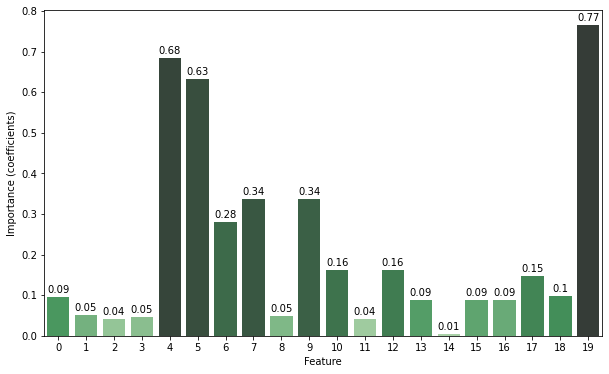

In [45]:
f6, ax6 = plt.subplots(figsize=(10,6))
pal = sns.color_palette("Greens_d", len(feature_imp))
rank = feature_imp['Importance'].rank(ascending=False).values
rank = (rank-1).astype(np.int)
g6=sns.barplot(x='Feature',y='Importance',data=feature_imp, palette=np.array(pal[::-1])[rank])
g6.set_ylabel('Importance (coefficients)')

for index, row in feature_imp.iterrows():
    g6.text(row.name,row.Importance + 0.01, round(row.Importance,2), color='black', ha="center")

plt.show()
f6.tight_layout()
f6.savefig('plots/featImp.png', facecolor = 'white')

# 8 Resultados

## 8.1 Principais métricas da análise (accuracy e AUC)

In [46]:
print('O modelo de Regressão Logística teve {:2.2%} de precisão e {:2.2%} de AUC nos dados de treino.'.format(acc_train_final
                                                                                                             ,auc_train_final))
print('O modelo de Regressão Logística teve {:2.2%} de precisão e {:2.2%} de AUC nos dados de teste.'.format(acc_test_final
                                                                                                             ,auc_test_final))

O modelo de Regressão Logística teve 77.29% de precisão e 82.71% de AUC nos dados de treino.
O modelo de Regressão Logística teve 78.16% de precisão e 84.39% de AUC nos dados de teste.


## 8.2 Confusion Matrix

In [47]:
print("Treino")
print(confusion_matrix(prevs_train_final, Y_train_pipe))
print("\nTeste")
print(confusion_matrix(prevs_test_final, Y_test_pipe))

Treino
[[2204  111]
 [ 646  372]]

Teste
[[1123   44]
 [ 320  180]]


## 8.3 Classification Report

In [48]:
print("Treino")
print(classification_report(Y_train_pipe, prevs_train_final))
print("\nTeste")
print(classification_report(Y_test_pipe, prevs_test_final))

Treino
              precision    recall  f1-score   support

         0.0       0.95      0.77      0.85      2850
         1.0       0.37      0.77      0.50       483

    accuracy                           0.77      3333
   macro avg       0.66      0.77      0.67      3333
weighted avg       0.87      0.77      0.80      3333


Teste
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1443
           1       0.36      0.80      0.50       224

    accuracy                           0.78      1667
   macro avg       0.66      0.79      0.68      1667
weighted avg       0.88      0.78      0.81      1667



## 8.4 ROC Curve

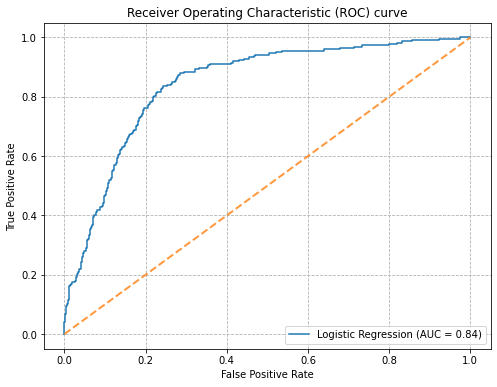

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_roc_curve(gridCV, X_test_pipe, Y_test_pipe, ax=ax, name = 'Logistic Regression')
ax.set_title('Receiver Operating Characteristic (ROC) curve')
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, label=None, alpha=.8)
ax.grid(linestyle='--')
plt.show()